# Test set evaluation on stochastic models

The purpose of this experiment is to measure how the **validation accuracy** changes accross a single model trained with different values of **alpha**.

It will solely examine the models' classification performance and not their masking performance.

In [1]:
import sys
sys.path.append('..')

from utils.plotting import *

%matplotlib inline

## 1. Compare each each set of experiments

First let's load the baseline.

In [2]:
baseline_loc = '../results/cifar10/seeker/default/baseline.txt'
with open(baseline_loc) as f:
    baseline = float(f.read())
print('Baseline accuracy: {:.2f}%'.format(baseline * 100))

Baseline accuracy: 65.37%


### a) ST1

Text(0.5, 1.0, 'Straight-Through v1')

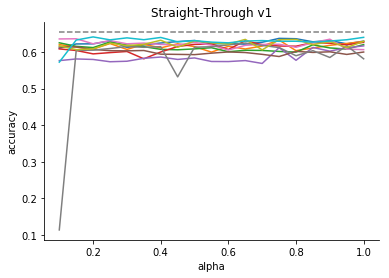

In [3]:
result_dir = '../results/cifar10/hns/stochastic/st1/full_training_10/'
st1 = read_results(result_dir)

plot_all_results(st1, baseline=baseline)
plt.title('Straight-Through v1')

Text(0.5, 1.0, 'Straight-Through v1')

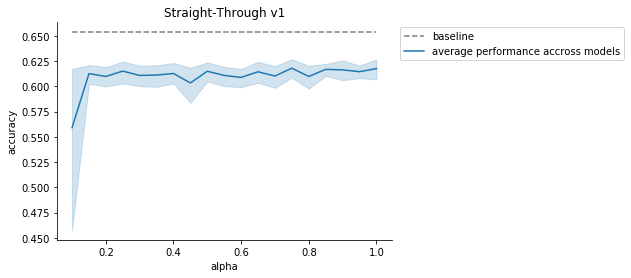

In [4]:
plot_average_results(st1, baseline=baseline)
plt.title('Straight-Through v1')

Pretty standard performance. The models are very low-variance, with the exception of a single model whose performance droped significantly for low alpha (probably it collapsed to masking everything). If the training lasted longer maybe it could have recovered. 

### b) ST2

Text(0.5, 1.0, 'Straight-Through v2')

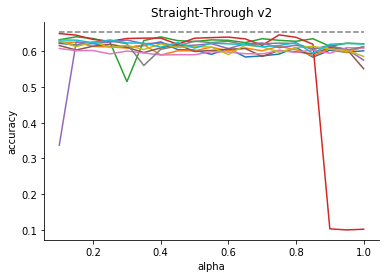

In [5]:
result_dir = '../results/cifar10/hns/stochastic/st2/full_training_10/'
st2 = read_results(result_dir)

plot_all_results(st2, baseline=baseline)
plt.title('Straight-Through v2')

Text(0.5, 1.0, 'Straight-Through v2')

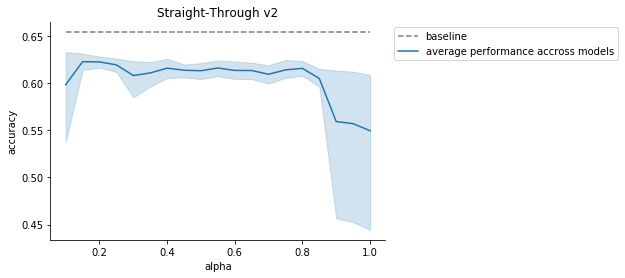

In [6]:
plot_average_results(st2, baseline=baseline)
plt.title('Straight-Through v2')

The model that drops for high values of alpha is very unexpected. Probably the training procedure droped the alpha before it was able to learn to classify properly. Though it did manage to recover later.

### c) SA

#### Rate=0.1

Text(0.5, 1.0, 'Slope-Annealing, Rate=0.1')

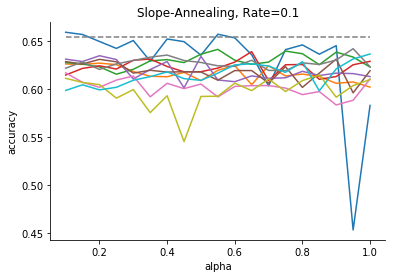

In [7]:
result_dir = '../results/cifar10/hns/stochastic/sa/rate_0.1/full_training_10/'
sa_01 = read_results(result_dir)

plot_all_results(sa_01, baseline=baseline)
plt.title('Slope-Annealing, Rate=0.1')

Text(0.5, 1.0, 'Slope-Annealing, Rate=0.1')

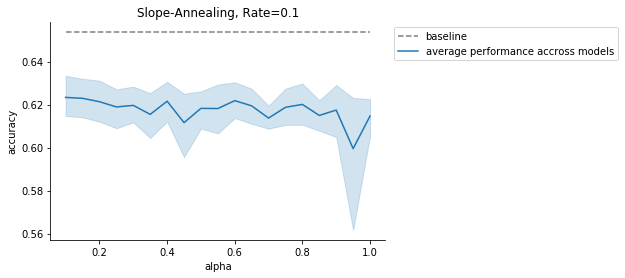

In [8]:
plot_average_results(sa_01, baseline=baseline)
plt.title('Slope-Annealing, Rate=0.1')

Again, a single model droped a bit during a high value of alpha (though it did recover later).

#### Rate=0.5

Text(0.5, 1.0, 'Slope-Annealing, Rate=0.5')

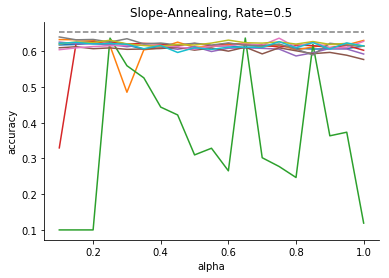

In [9]:
result_dir = '../results/cifar10/hns/stochastic/sa/rate_0.5/full_training_10/'
sa_05 = read_results(result_dir)

plot_all_results(sa_05, baseline=baseline)
plt.title('Slope-Annealing, Rate=0.5')

Text(0.5, 1.0, 'Slope-Annealing, Rate=0.5')

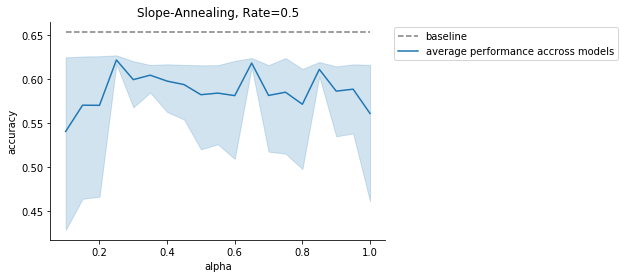

In [10]:
plot_average_results(sa_05, baseline=baseline)
plt.title('Slope-Annealing, Rate=0.5')

#### Rate=1

Error in file: ../results/cifar10/hns/stochastic/sa/rate_1.0/full_training_10/9/results.pkl


Text(0.5, 1.0, 'Slope-Annealing, Rate=1')

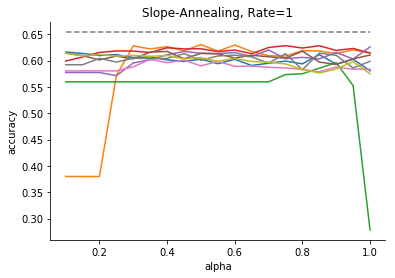

In [11]:
result_dir = '../results/cifar10/hns/stochastic/sa/rate_1.0/full_training_10/'
sa_1 = read_results(result_dir)

plot_all_results(sa_1, baseline=baseline)
plt.title('Slope-Annealing, Rate=1')

Text(0.5, 1.0, 'Slope-Annealing, Rate=1')

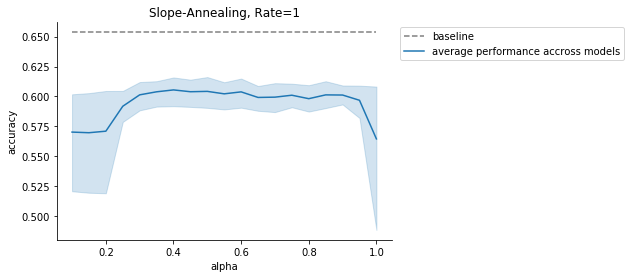

In [12]:
plot_average_results(sa_1, baseline=baseline)
plt.title('Slope-Annealing, Rate=1')

#### Rate=10

Error in file: ../results/cifar10/hns/stochastic/sa/rate_10.0/full_training_10/6/results.pkl
Error in file: ../results/cifar10/hns/stochastic/sa/rate_10.0/full_training_10/7/results.pkl


Text(0.5, 1.0, 'Slope-Annealing, Rate=10')

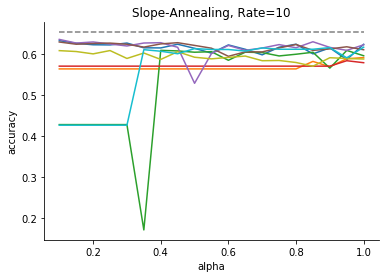

In [13]:
result_dir = '../results/cifar10/hns/stochastic/sa/rate_10.0/full_training_10/'
sa_10 = read_results(result_dir)

plot_all_results(sa_10, baseline=baseline)
plt.title('Slope-Annealing, Rate=10')

Text(0.5, 1.0, 'Slope-Annealing, Rate=10')

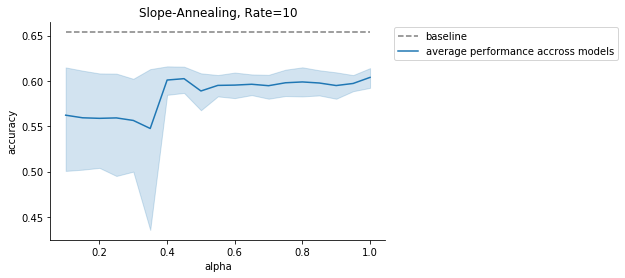

In [14]:
plot_average_results(sa_10, baseline=baseline)
plt.title('Slope-Annealing, Rate=10')

#### Rate=100

Text(0.5, 1.0, 'Slope-Annealing, Rate=100')

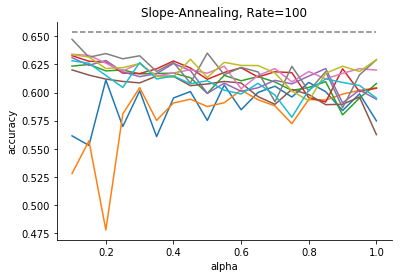

In [15]:
result_dir = '../results/cifar10/hns/stochastic/sa/rate_100.0/full_training_10/'
sa_100 = read_results(result_dir)

plot_all_results(sa_100, baseline=baseline)
plt.title('Slope-Annealing, Rate=100')

Text(0.5, 1.0, 'Slope-Annealing, Rate=100')

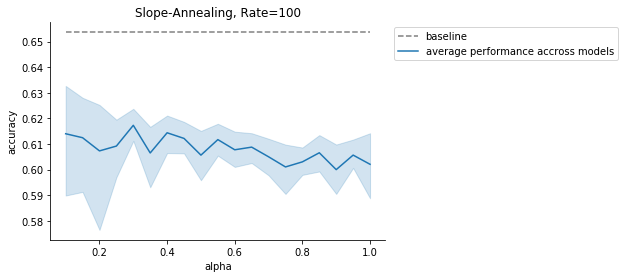

In [16]:
plot_average_results(sa_100, baseline=baseline)
plt.title('Slope-Annealing, Rate=100')

#### SA rate comparison



In [17]:
print('Rate 0.1: ', sa_01['accuracy'].mean())
print('Rate 0.5: ', sa_05['accuracy'].mean())
print('Rate   1: ', sa_1['accuracy'].mean())
print('Rate  10: ', sa_10['accuracy'].mean())
print('Rate 100: ', sa_100['accuracy'].mean())

Rate 0.1:  0.617463356727048
Rate 0.5:  0.5870018933556582
Rate   1:  0.5941473057395533
Rate  10:  0.5846460406717501
Rate 100:  0.6079384588881542


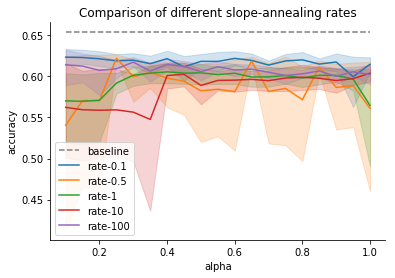

In [18]:
plot_average_results(sa_01, baseline=baseline, label='rate-0.1')
plot_average_results(sa_05, label='rate-0.5')
plot_average_results(sa_1, label='rate-1')
plot_average_results(sa_10, label='rate-10')
plot_average_results(sa_100, label='rate-100')

plt.title('Comparison of different slope-annealing rates')
plt.legend()

We can't make a safe conclusion as to which rates are optimal because their performance seems to be random. The best however results came for a rate of $0.1$, which is what we'll use for future comparisons.

### REINFORCE

We know that this estimator doesn't work properly but since we have the logs available we'll plot them too.

Error in file: ../results/cifar10/hns/stochastic/reinforce/full_training_10/1/results.pkl
Error in file: ../results/cifar10/hns/stochastic/reinforce/full_training_10/9/results.pkl


Text(0.5, 1.0, 'REINFORCE')

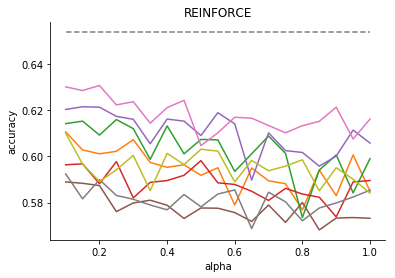

In [19]:
result_dir = '../results/cifar10/hns/stochastic/reinforce/full_training_10/'
reinforce = read_results(result_dir)

plot_all_results(reinforce, baseline=baseline)
plt.title('REINFORCE')

Text(0.5, 1.0, 'REINFORCE')

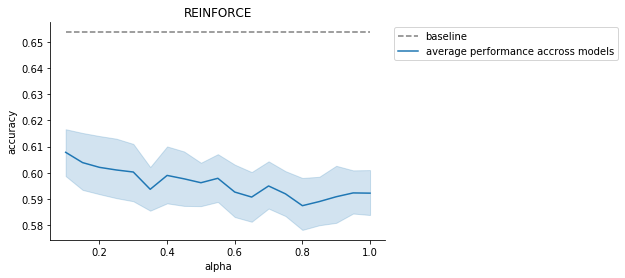

In [20]:
plot_average_results(reinforce, baseline=baseline)
plt.title('REINFORCE')

## 2. Comparative

### a) mean comparison

we'll first compare the **mean** of all 10 experiments run for each setting.

Text(0.5, 1.0, 'Comparison of different stochastic estimators')

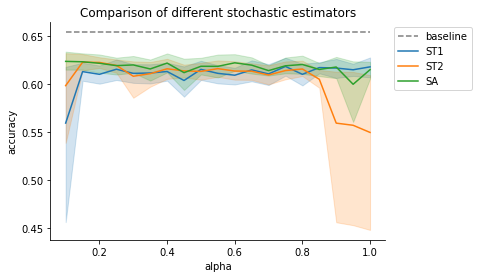

In [21]:
plot_average_results(st1, baseline=baseline, label='ST1')
plot_average_results(st2, label='ST2')
plot_average_results(sa_01, label='SA')

plt.title('Comparison of different stochastic estimators')

Besides a few flucturatiuons on the edges, all three estimators seem to exhibit similar behavior on the test set. Initially results seem **much more stable** than their deterministic counterpart.

### b) best comparison

Now, we'll compare the **best** out of all 10 models for each setting.

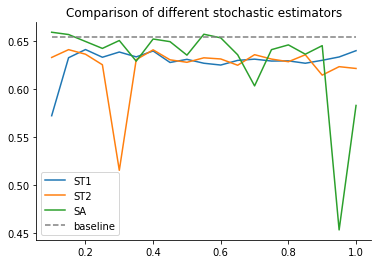

In [22]:
best_st1_idx = st1.groupby('experiment')['accuracy'].sum().idxmax()
best_st2_idx = st2.groupby('experiment')['accuracy'].sum().idxmax()
best_sa_idx = sa_01.groupby('experiment')['accuracy'].sum().idxmax()

best_st1 = st1[st1['experiment'] == best_st1_idx]
best_st2 = st2[st2['experiment'] == best_st2_idx]
best_sa = sa_01[sa_01['experiment'] == best_sa_idx]

plt.plot(best_st1['alpha'], best_st1['accuracy'], label='ST1')
plt.plot(best_st2['alpha'], best_st2['accuracy'], label='ST2')
plt.plot(best_sa['alpha'], best_sa['accuracy'], label='SA')

plt.plot(alphas, [baseline] * 19, label='baseline', c='0.5', ls='--')

plt.legend()

plt.title('Comparison of different stochastic estimators')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Again, there is little we can tell about these estimators from this perspective. An interesting thing is that we actually have a model with an alpha of 0.1 surpassing the baseline. This could however be a model that didn't actually manage to hide anything. It's hard to tell from this graph.

## Discussion

### Definitions

These were previously defined on the deterministic validation notebook:


> - There are two factors that come into play: **performance** (i.e. how high the accuracy was for a certain model) and **variance** (i.e. if we repeat the experiment how likely are we to expect the same performance.)
> - There are two types of variance we observed here. Variance of a single model for different values of alpha and the variance for training the same model more than once. When we use the term *variance* we'll refer to **both** types.
> - We want a model to have **high performance** (i.e. high accuracy) and **low variance** (i.e. few fluctuations in performance).
> - The performance of a trained seeker, on its own, will be referred to as the **baseline** performance. Obviously, because we are hiding information, the models aren't able to surpass this performance. It will serve as the upper limit for our experiments.
> - There are two extreme states that the model can get *locked* into, which provide suboptimal solutions:
> 
>     - The model doesn't hide anything, but classifies correctly.
>     - The model hides everything, but classifies randomly.
> 
>     These states will be referred to as **collapses**.

### Observations

- The choice of estimator had little effect to the classification performance of the models.
- The above is true both in terms of peak performance and variance.
- Regarding the rates of the slope-annealing estimators, we couldn't make any safe conclusions as to which is best.